Reading and pre-processing data.
includes encoding, normalizing and define target

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv("Dataset/anti-malware.csv") 

data = data.dropna()

label_enc = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = label_enc.fit_transform(data[col])

X = data.drop(columns=['OUTPUT'])
y = data['OUTPUT']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split data to test and train

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

<h1>Reggression model</h1>

fitting the model with X_train and y_train

In [40]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

Model Evaluation with confusion matrix:

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm_log = confusion_matrix(y_test, y_pred_log)
acc_log = accuracy_score(y_test, y_pred_log)




Plotting the confusion Matrix

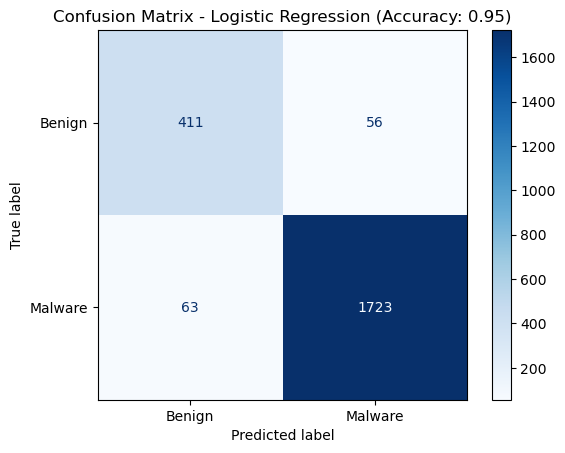

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Benign', 'Malware'])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - Logistic Regression (Accuracy: {acc_log:.2f})")
plt.show()

<h1>Naive Bayes Model</h1>

Training the model:

In [43]:
from sklearn.naive_bayes import GaussianNB

bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)
y_pred_bayes = bayes_model.predict(X_test)


Model Evaluation:

In [44]:
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
acc_bayes = accuracy_score(y_test, y_pred_bayes)

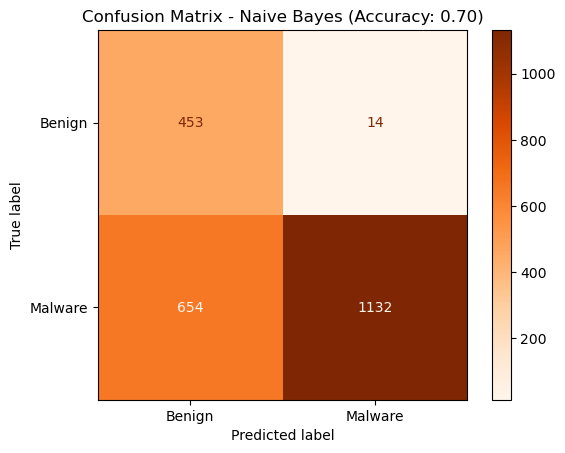

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bayes, display_labels=['Benign', 'Malware'])
disp.plot(cmap='Oranges')
plt.title(f"Confusion Matrix - Naive Bayes (Accuracy: {acc_bayes:.2f})")
plt.show()

<h1>Comparing Two models</h1>

In [48]:
print(f"Accuracy (Logistic Regression): {acc_log}")
print(f"Accuracy (Naive Bayes): {acc_bayes}")


Accuracy (Logistic Regression): 0.9471815357301376
Accuracy (Naive Bayes): 0.7035064358632934


<h1>Question:</h1>

<h2>Which is better and why?</h2>

اگر داده‌های به‌خوبی نرمال‌سازی شده‌اند و ویژگی‌ها مستقل نیستند رگرسیون لجستیکی عملکرد بهتری دارد.
اما اگر داده‌ها ساده و مستقل باشند یا حجم داده زیاد باشد، بیزین سریع‌تر و سبک‌تر خواهد بود.
در اکثر پروژه‌های تشخیص بدافزار، لاجستیگ به‌دلیل دقت بالاتر و توانایی مدل‌سازی روابط پیچیده‌تر، انتخاب مناسب‌تری است.